# Breast Cancer Prediction Using Support Vector Classifier and PCA

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Load breast_cancer dataset
from sklearn.datasets import load_breast_cancer

# Assign it into cancer variable
cancer = load_breast_cancer()

# Show keys
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [2]:
# Display database describtion
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [3]:
# Dislay Feature names
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# Create df_feat dataframe using data and feature_names keys of the database
df_feat = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

# Check the head of df_feat
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Check the info of df_feat
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [6]:
# Display the target names
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

## Support Vector Classifier Model Creation

In [7]:
# Create independent variables
X = df_feat

# Create dependent variables
y = cancer['target']

# Use train_test_split
from sklearn.model_selection import train_test_split

# Split the data into training set and testing set and set test_size = 0.3 and random_state = 11
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Import SVC
from sklearn.svm import SVC

# Create an instance of SVC() called model
model = SVC()

# Train/fit model on the training data.
model.fit(X_train, y_train)

# Use mdoel.predict() to predict off the X_test set of the data.
predictions = model.predict(X_test)

## Model Evaluation

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        63
          1       0.63      1.00      0.77       108

avg / total       0.40      0.63      0.49       171



In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[  0  63]
 [  0 108]]


## Grid Search

In [10]:
# Import GridsearchCV from SciKit Learn.
from sklearn.model_selection import GridSearchCV

# Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1,0.1,0.01,0.001]}

# Create a GridSearchCV object and fit it to the training data.
grid = GridSearchCV(SVC(), param_grid, verbose = 2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    3.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [11]:
# Use grid.predict() to predict off the X_test set of the data.
grid_predictions = grid.predict(X_test)

# Show best parameters
grid.best_params_

{'C': 1, 'gamma': 0.001}

## Model Evaluation

In [12]:
# Create a classification report from the results.
print(classification_report(y_test, grid_predictions))

             precision    recall  f1-score   support

          0       0.87      0.95      0.91        63
          1       0.97      0.92      0.94       108

avg / total       0.93      0.93      0.93       171



In [13]:
# Create a confusion matrix from the results.
print(confusion_matrix(y_test, grid_predictions))

[[60  3]
 [ 9 99]]


## Data Scaling 

In [14]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler() called scaler
scaler = StandardScaler()

# Compute the mean and std to be used for later scaling.
scaler.fit(df_feat)

# Use a previously computed mean and std to autoscale the data
scaled_data = scaler.transform(df_feat)

## PCA

In [15]:
# Imort PCA
from sklearn.decomposition import PCA

# Create an instance of PCA() called pca
pca = PCA(n_components=2)

# Find the internal parameters of a model that will be used to transform data.
pca.fit(scaled_data)

# Apply the parameters to data
x_pca = pca.transform(scaled_data)

Text(0,0.5,'Second Principal Component')

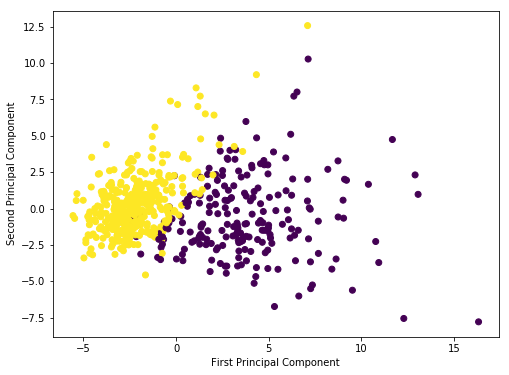

In [16]:
# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [17]:
# Create df_comp dataframe that shows vectors inside Principal Components corresponding to the each feature names
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])

# Display df_comp
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


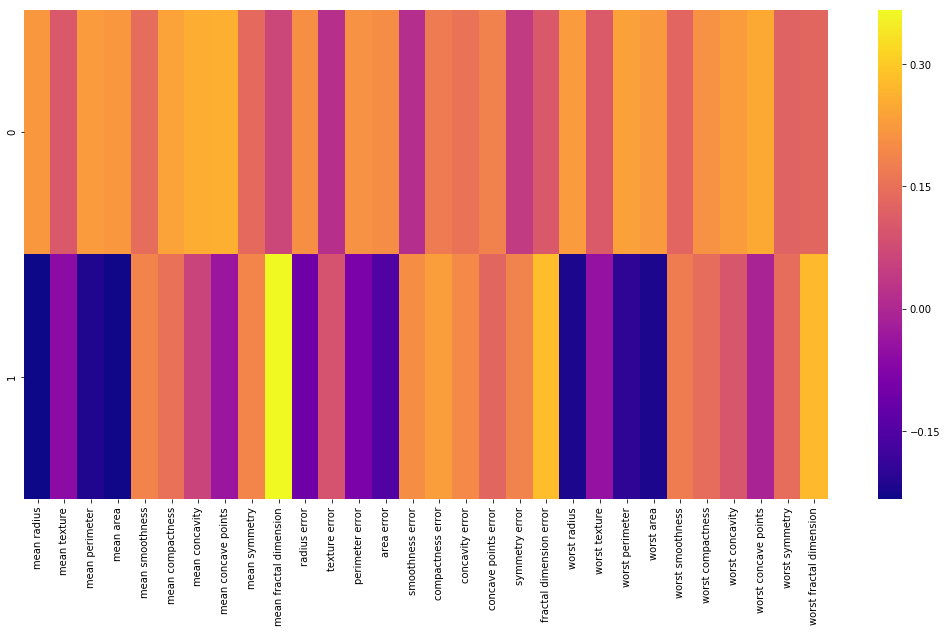

In [18]:
# Create the heatmap of the df_comp
plt.figure(figsize=(18, 9))
sns.heatmap(df_comp, cmap='plasma')

In [19]:
# Show how much of the variance explained by only 2 principal components
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.44272026, 0.18971182])

## Support Vector Classifier Using Principal Components as training data

In [20]:
# Create independent variables
X = x_pca

# Create dependent variables
y = cancer['target']

# Split the data into training set and testing set and set test_size = 0.3 and random_state = 11
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of SVC() called model
model1 = SVC()

# Train/fit model on the training data.
model1.fit(X_train, y_train)

# Use mdoel.predict() to predict off the X_test set of the data.
predictions1 = model1.predict(X_test)

## Model Evaluation

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions1))

             precision    recall  f1-score   support

          0       0.92      0.95      0.94        63
          1       0.97      0.95      0.96       108

avg / total       0.95      0.95      0.95       171



In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions1))

[[ 60   3]
 [  5 103]]


## Grid Search

In [23]:
# Import GridsearchCV from SciKit Learn.
from sklearn.model_selection import GridSearchCV

# Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1,0.1,0.01,0.001]}

# Create a GridSearchCV object and fit it to the training data.
grid1 = GridSearchCV(SVC(), param_grid, verbose = 2, cv = 3)
grid1.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.0s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [24]:
# Use grid.predict() to predict off the X_test set of the data.
grid_predictions1 = grid1.predict(X_test)

# Show best parameters
grid.best_params_

{'C': 1, 'gamma': 0.001}

## Model Evaluation

In [25]:
# Create a classification report from the results.
print(classification_report(y_test, grid_predictions1))

             precision    recall  f1-score   support

          0       0.97      0.92      0.94        63
          1       0.95      0.98      0.97       108

avg / total       0.96      0.96      0.96       171



In [26]:
# Create a confusion matrix from the results.
print(confusion_matrix(y_test, grid_predictions1))

[[ 58   5]
 [  2 106]]
